In [ ]:
# prompt: load google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/TimeSeriesClass-Fall2024/Week4/monthly-milk-production-pounds.csv', index_col='Month', parse_dates=True)


In [ ]:
# Display the first few rows of the dataset
print(data.head())

            Monthly milk production (pounds per cow)
Month                                               
1962-01-01                                       589
1962-02-01                                       561
1962-03-01                                       640
1962-04-01                                       656
1962-05-01                                       727


In [ ]:
# Rename the column
data.rename(columns={"Monthly milk production (pounds per cow)": "Milk Production"}, inplace=True)

# Display the first few rows of the dataset
print(data.head())

            Milk Production
Month                      
1962-01-01              589
1962-02-01              561
1962-03-01              640
1962-04-01              656
1962-05-01              727


In [ ]:
# Calculate the Simple Moving Average (SMA) - Let's take 12 months as the window for yearly average
data['SMA_12'] = data['Milk Production'].rolling(window=12).mean()

# Shift the SMA to use for forecasting (as discussed in the PDF)
data['SMA_12_shifted'] = data['SMA_12'].shift(1)

# Calculate the Exponential Moving Average (EMA)
data['EMA_12'] = data['Milk Production'].ewm(span=12, adjust=False).mean()

# Shift the EMA to simulate its use for forecasting the next period
data['EMA_12_shifted'] = data['EMA_12'].shift(1)

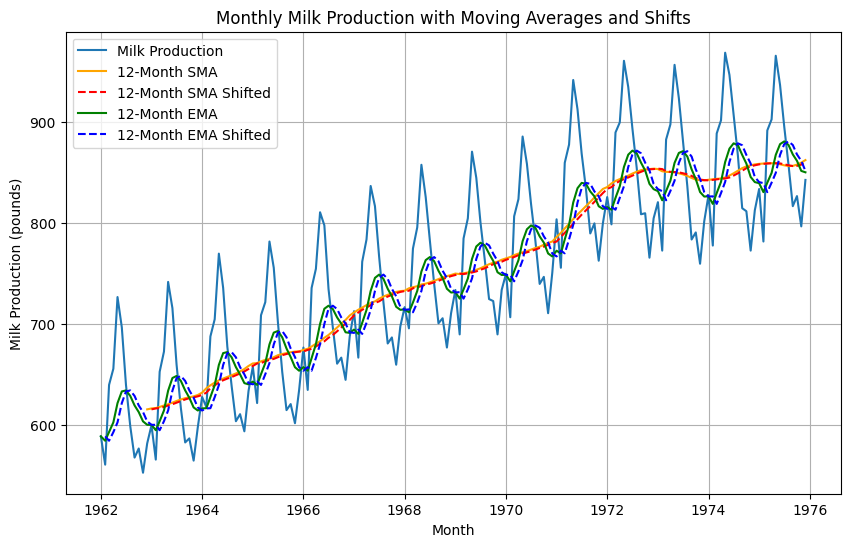

In [ ]:
# Plot the results to visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Milk Production'], label='Milk Production')
plt.plot(data['SMA_12'], label='12-Month SMA', color='orange')
plt.plot(data['SMA_12_shifted'], label='12-Month SMA Shifted', color='red', linestyle='--')
plt.plot(data['EMA_12'], label='12-Month EMA', color='green')
plt.plot(data['EMA_12_shifted'], label='12-Month EMA Shifted', color='blue', linestyle='--')
plt.title('Monthly Milk Production with Moving Averages and Shifts')
plt.xlabel('Month')
plt.ylabel('Milk Production (pounds)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Custom EMA with alpha = 0.6 using only the last two values
data['Custom_EMA_0.6'] = data['Milk Production'].ewm(alpha=0.6, adjust=False).mean()

# Shift the custom EMA to simulate its use for forecasting
data['Custom_EMA_0.6_shifted'] = data['Custom_EMA_0.6'].shift(1)

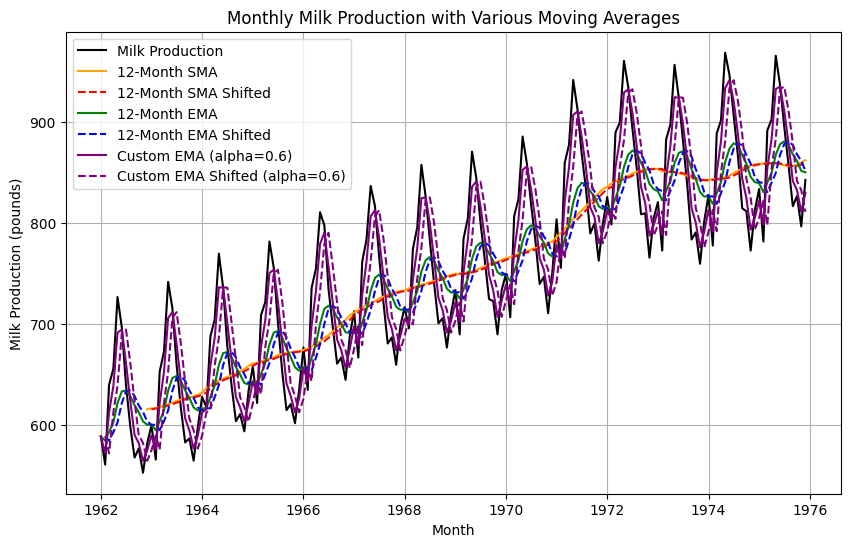

In [ ]:
# Plot the results to visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Milk Production'], label='Milk Production', color='black')
plt.plot(data['SMA_12'], label='12-Month SMA', color='orange')
plt.plot(data['SMA_12_shifted'], label='12-Month SMA Shifted', color='red', linestyle='--')
plt.plot(data['EMA_12'], label='12-Month EMA', color='green')
plt.plot(data['EMA_12_shifted'], label='12-Month EMA Shifted', color='blue', linestyle='--')
plt.plot(data['Custom_EMA_0.6'], label='Custom EMA (alpha=0.6)', color='purple')
plt.plot(data['Custom_EMA_0.6_shifted'], label='Custom EMA Shifted (alpha=0.6)', color='purple', linestyle='--')

# Customize the plot
plt.title('Monthly Milk Production with Various Moving Averages')
plt.xlabel('Month')
plt.ylabel('Milk Production (pounds)')
plt.legend()
plt.grid(True)
plt.show()

# Train Test Split

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/content/drive/MyDrive/TimeSeriesClass-Fall2024/Week4/monthly-milk-production-pounds.csv', index_col='Month', parse_dates=True)
data.rename(columns={"Monthly milk production (pounds per cow)": "Milk Production"}, inplace=True)



In [ ]:
# Set the frequency to 'MS' (monthly start)
data.index = pd.date_range(start=data.index[0], periods=len(data), freq='MS')

In [ ]:
# Use train_test_split from sklearn but disable shuffling
train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [ ]:
# Initialize the Simple Exponential Smoothing model on the training set
model = SimpleExpSmoothing(train['Milk Production'])

# Fit the model with alpha=0.1
fitted_model = model.fit(smoothing_level=0.1, optimized=False)

# Use the fitted model to forecast for the length of the test set
forecast = fitted_model.forecast(steps=len(test))

In [ ]:
# Combine the actual test data and forecast into a single DataFrame for comparison
forecast_df = pd.DataFrame({
    'Actual': test['Milk Production'],
    'Forecast': forecast
})

In [ ]:
forecast_df.head()

,Actual,Forecast
1973-03-01,883,827.070568
1973-04-01,898,827.070568
1973-05-01,957,827.070568
1973-06-01,924,827.070568
1973-07-01,881,827.070568
